# Online Shopper's Intention

We will be doing EDA and predictions on https://www.kaggle.com/roshansharma/online-shoppers-intention/data

Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.
Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.
Relevant Papers:

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link]
---

## Read in the Data

The cell below will download the necessary, project data and extract the files into the folder `data/`.


https://www.kaggle.com/roshansharma/online-shoppers-intention/data

In [119]:
# NOTE:
# you only need to run this cell if you have not yet downloaded the data
# otherwise you may skip this cell or comment it out

#!git clone https://github.com/lakshyakh93/OnlineShoppingCapstone.git 


In [120]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

This plagiarism dataset is made of multiple text files; each of these files has characteristics that are is summarized in a `.csv` file named `file_information.csv`, which we can read in using `pandas`.

In [121]:
csv_file = 'data/online_shoppers_intention.csv'
df = pd.read_csv(csv_file)

# print out the first few rows of data info
df[:15]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


## Data Type

Looks like data is at session level, and we can use these features to predict if session will get converted to revenue.

## Data Visualization



Visualizing distribution of certain features

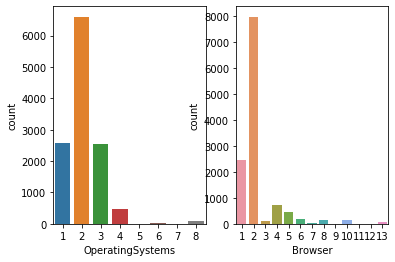

In [122]:
fig, ax =plt.subplots(1,2)
sns.countplot(df['OperatingSystems'], ax=ax[0])
sns.countplot(df['Browser'], ax=ax[1])
fig.show()


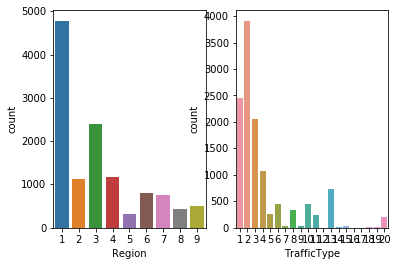

In [123]:
fig, ax =plt.subplots(1,2)
sns.countplot(df['Region'], ax=ax[0])
sns.countplot(df['TrafficType'], ax=ax[1])
fig.show()

Looking at distribution of features with revenue type

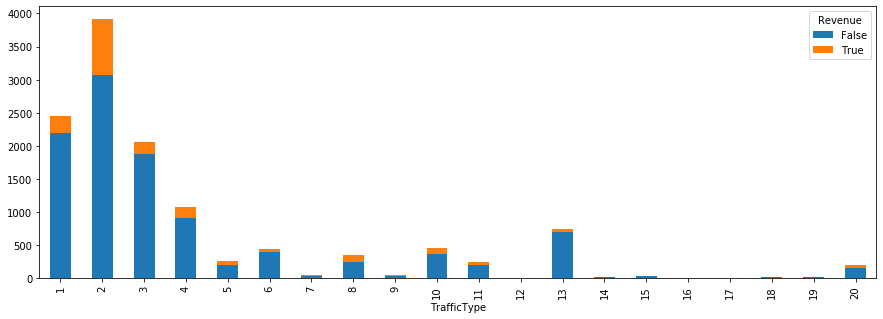

In [124]:
pd.crosstab(df['TrafficType'],df['Revenue']).plot(kind = 'bar', stacked = True, figsize = (15, 5))

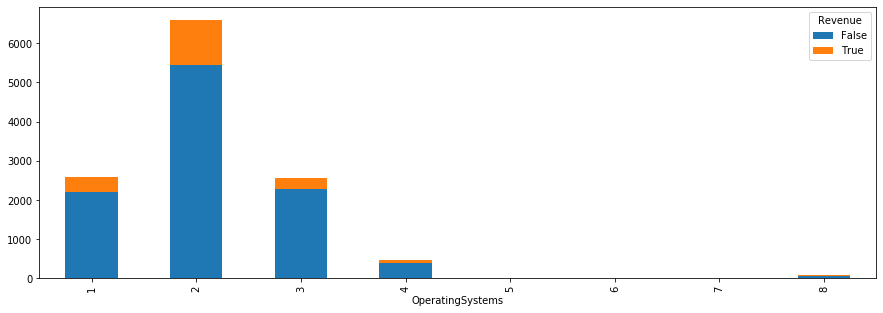

In [125]:
pd.crosstab(df['OperatingSystems'],df['Revenue']).plot(kind = 'bar', stacked = True, figsize = (15, 5))

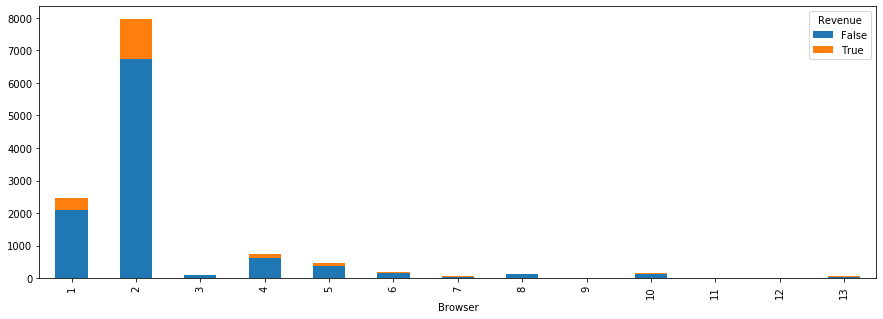

In [126]:
pd.crosstab(df['Browser'],df['Revenue']).plot(kind = 'bar', stacked = True, figsize = (15, 5))

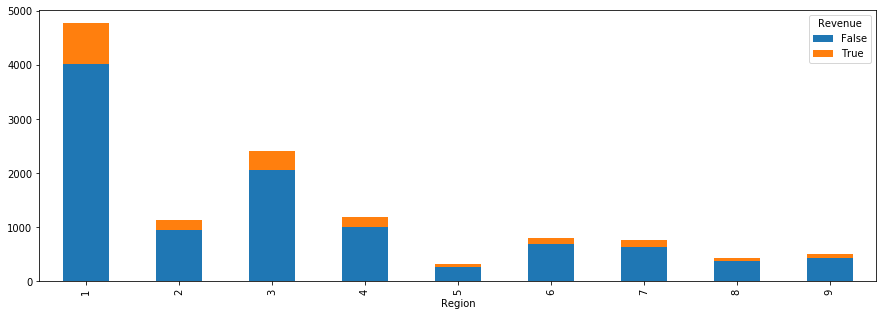

In [127]:
pd.crosstab(df['Region'],df['Revenue']).plot(kind = 'bar', stacked = True, figsize = (15, 5))

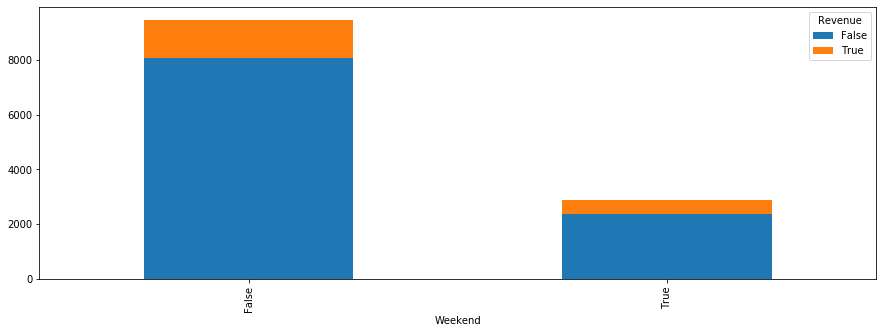

In [128]:
pd.crosstab(df['Weekend'],df['Revenue']).plot(kind = 'bar', stacked = True, figsize = (15, 5))

---
## Pre-Process the Data

Lets preprocess data and transformn it into a form which can be trained

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC


#converting category data using label encoder

le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])

df['Month'] = le.fit_transform(df['Month'])

#dropping missing values
df.dropna(inplace=True)



# removing the target column revenue 
X = df.drop(['Revenue'], axis = 1)
y = df['Revenue']



## Correlated Features

Let's look at correlation between features


In [130]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Create correlation matrix for just Features to determine different models to test

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601466,0.376782,0.255757,0.430832,0.373647,-0.223474,-0.316192,0.098771,-0.095054,0.048543,-0.006459,-0.025243,-0.005680,-0.033748,-0.025506,0.026404,0.138631
Administrative_Duration,0.601466,1.000000,0.302647,0.237959,0.288869,0.355238,-0.144128,-0.205618,0.067463,-0.073472,0.029048,-0.007425,-0.015525,-0.005681,-0.014487,-0.023743,0.014987,0.093395
Informational,0.376782,0.302647,1.000000,0.618965,0.374098,0.387446,-0.116071,-0.163539,0.048539,-0.048328,0.019737,-0.009435,-0.038257,-0.029442,-0.034510,0.055972,0.035557,0.095085
Informational_Duration,0.255757,0.237959,0.618965,1.000000,0.279966,0.347300,-0.074077,-0.105205,0.030787,-0.030658,0.005986,-0.009596,-0.019346,-0.027244,-0.024731,0.044781,0.024054,0.070250
ProductRelated,0.430832,0.288869,0.374098,0.279966,1.000000,0.860868,-0.204469,-0.292219,0.056067,-0.024190,0.070289,0.004193,-0.013326,-0.038318,-0.043235,0.126995,0.016097,0.158280
ProductRelated_Duration,0.373647,0.355238,0.387446,0.347300,0.860868,1.000000,-0.184409,-0.251645,0.052623,-0.036598,0.061174,0.002885,-0.007549,-0.033263,-0.036538,0.119640,0.007293,0.152130
BounceRates,-0.223474,-0.144128,-0.116071,-0.074077,-0.204469,-0.184409,1.000000,0.913436,-0.119357,0.073088,-0.023806,0.023965,-0.016009,-0.006731,0.078894,0.135470,-0.046870,-0.150621
ExitRates,-0.316192,-0.205618,-0.163539,-0.105205,-0.292219,-0.251645,0.913436,1.000000,-0.174397,0.102899,-0.039103,0.014745,-0.004407,-0.008836,0.078998,0.178928,-0.062942,-0.206886
PageValues,0.098771,0.067463,0.048539,0.030787,0.056067,0.052623,-0.119357,-0.174397,1.000000,-0.063660,0.021768,0.018466,0.045510,0.011233,0.012471,-0.111098,0.011993,0.492494
SpecialDay,-0.095054,-0.073472,-0.048328,-0.030658,-0.024190,-0.036598,0.073088,0.102899,-0.063660,1.000000,0.079332,0.012609,0.003412,-0.016188,0.052273,0.085713,-0.016792,-0.082468


In [131]:
#remove correlated features

#Product_related_duration <->  Product_related
#Exit_rates <-> Bounce_rates
df.drop(['ExitRates'],axis=1,inplace=True)
df.drop(['ProductRelated_Duration'],axis=1,inplace=True)


### Splitting Data

Train test splitting

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15,shuffle=True)

In [133]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)


(8621, 17)
(8621,)
(3695, 17)
(3695,)


---
## Creating Final Data Files

Using  make_csv function taught in class

In [134]:
def make_csv(x, y, filename, data_dir):
    '''Merges features and labels and converts them into one csv file with labels in the first column.
       :param x: Data features
       :param y: Data labels
       :param file_name: Name of csv file, ex. 'train.csv'
       :param data_dir: The directory where files will be saved
       '''
    # make data dir, if it does not exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    
    # your code here
    data =  pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1)
    data.to_csv(os.path.join(data_dir, filename), header=False, index=False)
    
    # nothing is returned, but a print statement indicates that the function has run
    print('Path created: '+str(data_dir)+'/'+str(filename))

In [135]:
# can change directory, if you want
data_dir = 'capstone_data'

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

make_csv(X_train, y_train, filename='train.csv', data_dir=data_dir)
make_csv(X_test, y_test, filename='test.csv', data_dir=data_dir)

Path created: capstone_data/train.csv
Path created: capstone_data/test.csv


# Uploading to S3 and Training on transformed data

In [136]:
import boto3
import sagemaker

In [137]:
# session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# create an S3 bucket
bucket = sagemaker_session.default_bucket()

In [138]:
# should be the name of directory you created to save your features data
data_dir = 'capstone_data'

# set prefix, a descriptive name for a directory  
prefix = 'capstone'

# upload all data to S3
data = sagemaker_session.upload_data(path=data_dir,bucket=bucket,key_prefix=prefix)

In [139]:
data

's3://sagemaker-us-east-2-560577859071/capstone'

In [140]:
!pygmentize source_sklearn/train_SVC.py

# Keeping the format same as plagarism project

from __future__ import print_function

import argparse
import os
import pandas as pd

from sklearn.externals import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## TODO: Import any additional libraries you need to define a model


# Provided model load function
def model_fn(model_dir):
    """Load model from the model_dir. This is the same model that is saved
    in the main if statement.
    """
    print("Loading model.")
    
    # load using joblib
    model = joblib.load(os.path.join(model_dir, "model.joblib"))
    print("Done loading model.")
    return model


if __name__ == '__main__':
    
    # All of the model parameters and training parameters are sent as arguments
    # when this script is executed, during a training job
    
    # Here we set up an argument parser to easily access the parameters
    parser = argparse.ArgumentParser()

    # SageMaker parameters, like the directories for

## Training with SVC

In [141]:
#Creating estimatoer


from sagemaker.sklearn.estimator import SKLearn

estimator = SKLearn(entry_point = "train_SVC.py",
                    source_dir = "source_sklearn",
                    train_instance_type = 'ml.c4.xlarge',
                    train_instance_count = 1,
                    role = role                     )

This is not the latest supported version. If you would like to use version 0.23-1, please add framework_version=0.23-1 to your constructor.


In [142]:
%%time

# Train your estimator on S3 training data

estimator.fit({'train': data})

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


2020-07-18 12:06:40 Starting - Starting the training job...
2020-07-18 12:06:42 Starting - Launching requested ML instances.........
2020-07-18 12:08:13 Starting - Preparing the instances for training...
2020-07-18 12:09:09 Downloading - Downloading input data...
2020-07-18 12:09:37 Training - Downloading the training image..2020-07-18 12:09:50,938 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2020-07-18 12:09:50,940 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-07-18 12:09:50,950 sagemaker_sklearn_container.training INFO     Invoking user training script.
2020-07-18 12:09:51,228 sagemaker-containers INFO     Module train_SVC does not provide a setup.py. 
Generating setup.py
2020-07-18 12:09:51,228 sagemaker-containers INFO     Generating setup.cfg
2020-07-18 12:09:51,228 sagemaker-containers INFO     Generating MANIFEST.in
2020-07-18 12:09:51,229 sagemaker-containers INFO     Installing module with the followi

## Deploying

In [143]:
%%time


# deploy your model to create a predictor
predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium'
)


Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


---------------!CPU times: user 262 ms, sys: 28.3 ms, total: 290 ms
Wall time: 7min 32s


## Determining accuracy

In [144]:
import os


# read in test data, assuming it is stored locally
test_data = pd.read_csv(os.path.join(data_dir, "test.csv"), header=None, names=None)

# labels are in the first column
test_y = test_data.iloc[:,0]
test_x = test_data.iloc[:,1:]

test_y_preds = predictor.predict( test_x )


from sklearn.metrics import accuracy_score
from sklearn import metrics


accuracy = accuracy_score(test_y,test_y_preds)
print(accuracy)


0.8530446549391069


## Training with Decision Tree

In [148]:
#Creating estimatoer


from sagemaker.sklearn.estimator import SKLearn

estimator2 = SKLearn(entry_point = "train_Tree.py",
                    source_dir = "source_sklearn",
                    train_instance_type = 'ml.c4.xlarge',
                    train_instance_count = 1,
                    role = role                     )

This is not the latest supported version. If you would like to use version 0.23-1, please add framework_version=0.23-1 to your constructor.


In [149]:
%%time

# Train your estimator on S3 training data

estimator2.fit({'train': data})

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


2020-07-18 12:21:11 Starting - Starting the training job...
2020-07-18 12:21:13 Starting - Launching requested ML instances......
2020-07-18 12:22:22 Starting - Preparing the instances for training...
2020-07-18 12:23:08 Downloading - Downloading input data...
2020-07-18 12:23:30 Training - Downloading the training image.2020-07-18 12:23:43,684 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2020-07-18 12:23:43,687 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-07-18 12:23:43,697 sagemaker_sklearn_container.training INFO     Invoking user training script.
2020-07-18 12:23:43,945 sagemaker-containers INFO     Module train_Tree does not provide a setup.py. 
Generating setup.py
2020-07-18 12:23:43,945 sagemaker-containers INFO     Generating setup.cfg
2020-07-18 12:23:43,945 sagemaker-containers INFO     Generating MANIFEST.in
2020-07-18 12:23:43,945 sagemaker-containers INFO     Installing module with the following 

### Deploying

In [158]:
%%time


# deploy your model to create a predictor
predictor2 = estimator2.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium'
)


Parameter image will be renamed to image_uri in SageMaker Python SDK v2.
Using already existing model: sagemaker-scikit-learn-2020-07-18-12-21-11-525


---------------!CPU times: user 275 ms, sys: 16.9 ms, total: 292 ms
Wall time: 7min 32s


### Determining accuracy

In [159]:
import os

test_y_preds2 = predictor2.predict( test_x )

# read in test data, assuming it is stored locally
test_data = pd.read_csv(os.path.join(data_dir, "test.csv"), header=None, names=None)

# labels are in the first column
test_y = test_data.iloc[:,0]
test_x = test_data.iloc[:,1:]

from sklearn.metrics import accuracy_score
from sklearn import metrics

accuracy = accuracy_score(test_y,test_y_preds2)
print(accuracy)


0.8703653585926928


In [160]:
predictor2.delete_endpoint()